<a href="https://colab.research.google.com/github/najiyasalam/Contact-test/blob/main/latest_video_sum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 886.3/886.3 kB 9.9 MB/s eta 0:00:00


In [2]:
from google.colab import files
files.upload()  #  upload kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"najiyaabdulsalamtt","key":"656a5a72b2bf413eb5dba687b17a9571"}'}

In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # Set permissions

In [4]:
!pip install kaggle

In [5]:
!kaggle datasets download -d fahaddalwai/cctvfootagevideo -p /content/

Dataset URL: https://www.kaggle.com/datasets/fahaddalwai/cctvfootagevideo
License(s): CC-BY-NC-SA-4.0
 83% 8.00M/9.68M [00:00<00:00, 70.9MB/s]
100% 9.68M/9.68M [00:00<00:00, 79.7MB/s]


In [6]:
!unzip /content/cctvfootagevideo.zip -d /content/cctvfootagevideo

Archive:  /content/cctvfootagevideo.zip
  inflating: /content/cctvfootagevideo/videoplayback (online-video-cutter.com).mp4  


In [7]:
!ls /content/cctvfootagevideo

'videoplayback (online-video-cutter.com).mp4'


In [8]:
!mkdir -p /content/frames

In [9]:
import cv2

# Path to the video file
video_path = '/content/cctvfootagevideo/videoplayback (online-video-cutter.com).mp4'
# Create a VideoCapture object to read the video
cap = cv2.VideoCapture(video_path)

# Check if the video was opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
else:
    # Initialize a counter for the extracted frames
    count = 0
    # Initialize a counter for total frames extracted
    extracted_frames = 0

    # Loop through the video frames
    while cap.isOpened():
        ret, frame = cap.read()  # Read a frame from the video
        if not ret:  # If there are no frames left, break the loop
            break
        # Always capture every frame for testing
        cv2.imwrite(f'/content/frames/frame_{extracted_frames}.jpg', frame)  # Save the frame
        extracted_frames += 1  # Increment the extracted frames counter

        # Print every 100 frames processed
        if count % 100 == 0:
            print(f"Processing frame {count}")

        count += 1  # Increment the total frame counter

    # Release the VideoCapture object
    cap.release()

    # Print the total number of frames extracted
    print(f'Total frames extracted: {extracted_frames}')

Processing frame 0
Processing frame 100
Processing frame 200
Processing frame 300
Processing frame 400
Processing frame 500
Processing frame 600
Processing frame 700
Processing frame 800
Processing frame 900
Processing frame 1000
Processing frame 1100
Processing frame 1200
Processing frame 1300
Processing frame 1400
Processing frame 1500
Processing frame 1600
Processing frame 1700
Processing frame 1800
Processing frame 1900
Processing frame 2000
Processing frame 2100
Processing frame 2200
Total frames extracted: 2298


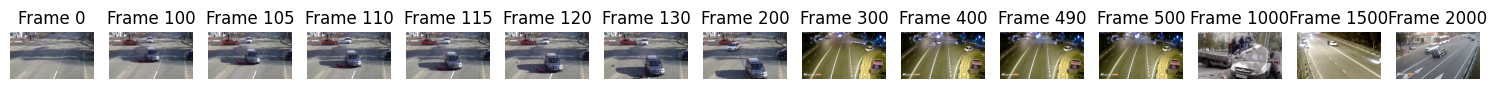

In [10]:
import matplotlib.pyplot as plt
import cv2

# Display every 500th frame
frame_indices = [0, 100, 105, 110, 115, 120, 130, 200, 300, 400, 490, 500, 1000, 1500, 2000]  # Adjust as needed

plt.figure(figsize=(15, 10))
for i, frame_index in enumerate(frame_indices):
    frame = cv2.imread(f'/content/frames/frame_{frame_index}.jpg')
    plt.subplot(1, len(frame_indices), i + 1)
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f'Frame {frame_index}')
plt.tight_layout()

In [11]:
import os

# Define the target directory for frames 0-200
target_folder = '/content/frames_0_to_200'
os.makedirs(target_folder, exist_ok=True)

In [12]:
import shutil

# Path to the original frames directory
original_frames_folder = '/content/frames'

# Move frames from 0 to 200
for i in range(201):  # This will move frames 0 to 200
    frame_file = f'frame_{i}.jpg'
    source_path = os.path.join(original_frames_folder, frame_file)
    target_path = os.path.join(target_folder, frame_file)

    # Move the frame file if it exists
    if os.path.exists(source_path):
        shutil.move(source_path, target_path)
        print(f'Moved: {source_path} to {target_path}')
    else:
        print(f'Frame {frame_file} does not exist in the original folder.')

print("Frames 0 to 200 have been moved to the new folder.")

Moved: /content/frames/frame_0.jpg to /content/frames_0_to_200/frame_0.jpg
Moved: /content/frames/frame_1.jpg to /content/frames_0_to_200/frame_1.jpg
Moved: /content/frames/frame_2.jpg to /content/frames_0_to_200/frame_2.jpg
Moved: /content/frames/frame_3.jpg to /content/frames_0_to_200/frame_3.jpg
Moved: /content/frames/frame_4.jpg to /content/frames_0_to_200/frame_4.jpg
Moved: /content/frames/frame_5.jpg to /content/frames_0_to_200/frame_5.jpg
Moved: /content/frames/frame_6.jpg to /content/frames_0_to_200/frame_6.jpg
Moved: /content/frames/frame_7.jpg to /content/frames_0_to_200/frame_7.jpg
Moved: /content/frames/frame_8.jpg to /content/frames_0_to_200/frame_8.jpg
Moved: /content/frames/frame_9.jpg to /content/frames_0_to_200/frame_9.jpg
Moved: /content/frames/frame_10.jpg to /content/frames_0_to_200/frame_10.jpg
Moved: /content/frames/frame_11.jpg to /content/frames_0_to_200/frame_11.jpg
Moved: /content/frames/frame_12.jpg to /content/frames_0_to_200/frame_12.jpg
Moved: /content/fra

In [15]:
import os
import cv2
import torch
import torchvision.transforms as transforms
from torchvision.models import ResNet50_Weights
from torchvision import models
import numpy as np

# Define the target directory with frames (moved frames 0-200)
frame_folder = '/content/frames_0_to_200'

# Load a pre-trained ResNet model for feature extraction
model = models.resnet50(weights=ResNet50_Weights.DEFAULT)
model.eval()


# Define transformation for the frames
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),  # ResNet input size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Function to extract features for each frame
def extract_features_from_frames(frame_folder):
    features_list = []
    frame_names = sorted(os.listdir(frame_folder))

    for img_name in frame_names:
        img_path = os.path.join(frame_folder, img_name)
        frame = cv2.imread(img_path)
        input_tensor = transform(frame).unsqueeze(0)  # Add batch dimension

        with torch.no_grad():
            features = model(input_tensor).squeeze().numpy()  # Flatten features to 1D
        features_list.append(features)

    return np.array(features_list), frame_names

# Extract features and store them in an array
features, frame_names = extract_features_from_frames(frame_folder)
print("Feature extraction completed. Feature shape:", features.shape)

Feature extraction completed. Feature shape: (201, 1000)


In [16]:
from sklearn.cluster import KMeans

# Specify the number of clusters (this can be adjusted based on your needs)
num_clusters = 5  # Example: you can change this value
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(features)

# Get cluster labels for each frame
labels = kmeans.labels_


In [17]:
import numpy as np

key_frames = []
for i in range(num_clusters):
    cluster_indices = np.where(labels == i)[0]
    cluster_features = features[cluster_indices]
    centroid = kmeans.cluster_centers_[i]

    # Find the frame closest to the centroid
    closest_frame_index = cluster_indices[np.argmin(np.linalg.norm(cluster_features - centroid, axis=1))]
    key_frames.append(closest_frame_index)

# Sort key frames by their original index
key_frames.sort()


In [18]:
# Assuming you have a function to get a description for each frame
def get_frame_description(frame_name):
    # Implement logic to generate descriptions (e.g., using a captioning model)
    return f"Description of {frame_name}"

# Generate the summary text
summary = []
for index in key_frames:
    frame_name = frame_names[index]
    description = get_frame_description(frame_name)
    summary.append(description)

# Join the descriptions to form a summary
text_summary = " ".join(summary)
print("Video Summary:", text_summary)


Video Summary: Description of frame_10.jpg Description of frame_102.jpg Description of frame_162.jpg Description of frame_47.jpg Description of frame_75.jpg


In [19]:
from transformers import BlipProcessor, BlipForConditionalGeneration

# Load a pre-trained image captioning model and processor
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
caption_model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

# Function to generate captions for the selected frames
def get_frame_description(img_path):
    # Load the image
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

    # Process the image and generate the caption
    inputs = processor(image, return_tensors="pt")
    out = caption_model.generate(**inputs)
    caption = processor.decode(out[0], skip_special_tokens=True)

    return caption

# Generate the summary text with real descriptions
summary = []
for index in key_frames:
    img_path = os.path.join(frame_folder, frame_names[index])
    description = get_frame_description(img_path)
    summary.append(description)

# Join the descriptions to form a summary
text_summary = " ".join(summary)
print("Video Summary:", text_summary)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1375: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Video Summary: a car is driving down the street in a city a car is seen in the middle of a street a car is seen in this image from the video a car is driving down the street in a city a car is seen in the middle of a street


In [20]:
from transformers import BlipProcessor, BlipForConditionalGeneration

# Function to get detailed descriptions based on object detection results
def get_detailed_description(img_path):
    # Perform object detection (you might already have object detection code)
    # Example: detect vehicles, collisions, road signs, people, etc.
    objects_detected = ["car", "collision", "road"]  # Placeholder list for objects detected in the frame

    # Generate a caption based on detected objects
    if "collision" in objects_detected:
        description = "A collision occurred on the road involving vehicles."
    elif "car" in objects_detected and "road" in objects_detected:
        description = "A car is driving on the road."
    else:
        description = "Various vehicles and road elements are visible."

    return description

# Generate a cohesive paragraph
summary_sentences = []
for index in key_frames:
    img_path = os.path.join(frame_folder, frame_names[index])
    description = get_detailed_description(img_path)
    summary_sentences.append(description)

# Construct the final paragraph with road accident context
intro = "The video captures a road incident where: "
conclusion = "These frames outline the main events in the road accident scene."

final_summary = f"{intro} {' '.join(summary_sentences)} {conclusion}"
print("Video Summary:", final_summary)


Video Summary: The video captures a road incident where:  A collision occurred on the road involving vehicles. A collision occurred on the road involving vehicles. A collision occurred on the road involving vehicles. A collision occurred on the road involving vehicles. A collision occurred on the road involving vehicles. These frames outline the main events in the road accident scene.


In [21]:
# Generate a coherent summary paragraph
summary_sentences = []
for index in key_frames:
    img_path = os.path.join(frame_folder, frame_names[index])
    description = get_frame_description(img_path)
    summary_sentences.append(description)

# Create a descriptive paragraph
text_summary = " ".join(summary_sentences)

# Add introductory and concluding sentences for better flow
intro = "In this video, we observe the following key moments: "
conclusion = "These moments highlight the essential content of the video."

# Final summary paragraph
final_summary = f"{intro} {text_summary} {conclusion}"
print("Video Summary:", final_summary)


Video Summary: In this video, we observe the following key moments:  a car is driving down the street in a city a car is seen in the middle of a street a car is seen in this image from the video a car is driving down the street in a city a car is seen in the middle of a street These moments highlight the essential content of the video.


In [22]:
from transformers import BlipProcessor, BlipForConditionalGeneration

# Load a pre-trained image captioning model and processor
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
caption_model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

# Function to generate captions for the selected frames
def get_frame_description(img_path):
    # Load the image
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

    # Process the image and generate the caption
    inputs = processor(image, return_tensors="pt")
    out = caption_model.generate(**inputs)
    caption = processor.decode(out[0], skip_special_tokens=True)

    return caption

# Generate the summary text with real descriptions
summary = []
for index in key_frames:
    img_path = os.path.join(frame_folder, frame_names[index])
    description = get_frame_description(img_path)
    summary.append(description)

# Join the descriptions to form a summary
text_summary = " ".join(summary)
print("Video Summary:", text_summary)


Video Summary: a car is driving down the street in a city a car is seen in the middle of a street a car is seen in this image from the video a car is driving down the street in a city a car is seen in the middle of a street
